# Задание 1
Решить краевую задачу:

$$
\begin{aligned}
&y^{\prime \prime}+(1-4 x) y^{\prime}+8 y=5, \quad 0<x<1 \\
&y^{\prime}(0)-y(0)=0 ; \quad y(1)=0
\end{aligned}
$$ 


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.optimize import newton
from scipy.optimize import root

from scipy import interpolate
from scipy import integrate

In [6]:
def function(x, y):
    return y[1], 5 - 8 * y[0] - y[1] * (3 - 4 * x) 

result_1 = solve_ivp(function, (0, 1), [0, 0], rtol=1e-10)
result_2 = solve_ivp(function, (0, 1), [0, 1], rtol=1e-10)

b_1 = result_1.y[1][result_1.y[1].shape[0] - 1] - result_1.y[0][result_1.y[0].shape[0] - 1]
b_2 = result_2.y[1][result_2.y[1].shape[0] - 1] - result_2.y[0][result_2.y[0].shape[0] - 1]

# b_1 = result_1.y[0, -1]
# b_2 = result_2.y[0, -1]

l = -b_1 / (b_2 - b_1)
result = solve_ivp(function, (0, 1), [0, l], rtol=1e-5)

result

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.736e-02  1.086e-01  2.104e-01  3.266e-01
             4.604e-01  6.142e-01  7.877e-01  9.765e-01  1.000e+00]
        y: [[ 0.000e+00 -1.232e-03 ...  9.523e-01  9.757e-01]
            [-1.167e-01 -2.607e-02 ...  1.017e+00  9.757e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 56
     njev: 0
      nlu: 0

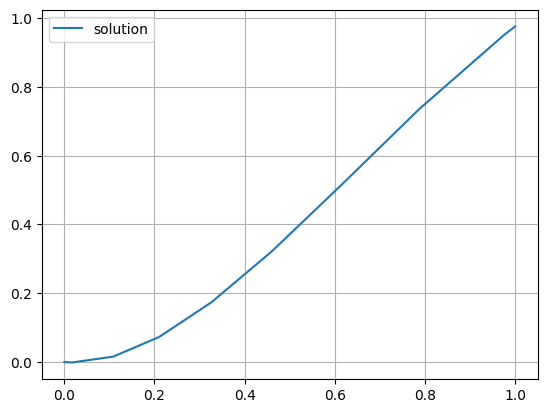

In [7]:
plt.plot(result.t, result.y[0,:], label='solution')
plt.legend()
plt.grid(True)
plt.show()

# Задание 2

In [8]:
def eqation(t, y):
    return -1 - y[0]**2, t * np.cos(t) - y[0] * y[1]

result = solve_ivp(eqation, (0, np.pi / 2), [3, 2], rtol=1e-5)
result

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.212e-02  9.992e-02  1.882e-01  2.980e-01
             4.352e-01  6.100e-01  8.378e-01  1.116e+00  1.427e+00
             1.571e+00]
        y: [[ 3.000e+00  2.793e+00 ... -1.801e-01 -3.333e-01]
            [ 2.000e+00  1.876e+00 ...  1.124e+00  1.182e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

In [9]:
a_0 = result.y[0][-1]
a_1 = result.y[1][-1]
b_0 = -5
b_1 = 2

print((b_1 - a_1) / (a_0 - b_0))           # y(pi/2)
print((b_0 * a_1 - b_1 * a_0) / (b_0 - a_0))       # dy(pi/2)/dx

0.17536030999279117
1.123198450036044


Видим, что условия соваладают

# Задание 3

In [10]:
def f(x):
    return 1 + np.exp(-3*(x-5)**2)
  
def Poisson(s, steps=1000):
    phi = lambda x, p: np.array([p[1], np.exp(p[0]) - f(x)])
    sol = integrate.solve_ivp(phi, (0, 10), [0, s], t_eval=np.linspace(0, 10, steps))
    yls = sol.y[0,-1]
    phi = interpolate.splrep(sol.t, sol.y[0,:])

    plt.plot(sol.t, sol.y[0,:])
    solYU = integrate.solve_ivp(lambda x, Y, a1, a2, a3: np.array([Y[1], np.exp(interpolate.splev(x, (a1, a2, a3)))*Y[0]]),
                                (0, 10), [0, 1], t_eval=np.linspace(0, 10, steps), args=(phi))
    Yls = solYU.y[0,-1]
    return s - yls/Yls

4 0.006520073423840416


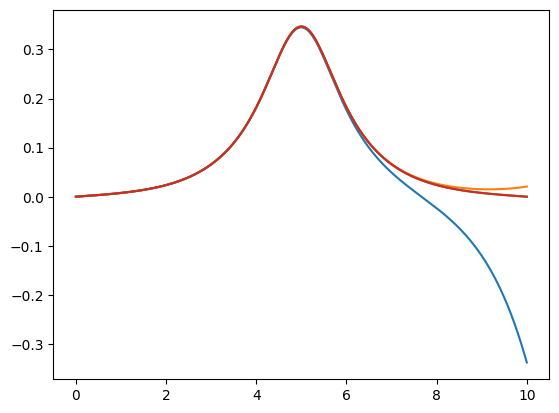

In [11]:
s = 0.0065
s_prev = 0
n = 0
while abs(s - s_prev) > 1e-10:
    s_prev = s
    s = Poisson(s_prev)
    n += 1

print(n, s)

# Задание 4

In [13]:
def function(phi, n, h):
    G = np.zeros_like(phi)
    G[0] = phi[1] - 2 * phi[0] - h**2 * (np.e**(phi[0]) - (1 + np.e**(-3*((0+1)*h - 5)**2)))
    for i in range(1, n - 3):
        G[i] =  phi[i+1] - 2 * phi[i] + phi[i-1] - h**2 * (np.e**(phi[i]) - (1 + np.e**(-3*((i+1)*h - 5)**2)))
    G[n-3] = phi[n-4] - 2 * phi[n-3] - h**2 * (np.e**(phi[n-3]) - (1 + np.e**(-3*((n-3+1)*h - 5)**2)))
    return G

In [14]:
h = 0.1
n = int(10/h)

x0 = np.zeros(n-2)
res = root(lambda x: function(x, n, h), x0, tol=1e-10)
print("Необходимо операций:", res.nfev)

Необходимо операций: 107
